In [1]:
# Initial imports
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import datetime
import numpy as np
#import tensorflow as tf

#  Import and read the file.
supply_df = pd.read_csv("CAISO-ALL-SUPPLY-DATA.csv")
supply_df.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,7/5/21,11:50:00,7/5/21 11:50
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,8/18/20,16:25:00,8/18/20 16:25
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,8/18/20,15:55:00,8/18/20 15:55
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,8/18/20,15:50:00,8/18/20 15:50
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,8/18/20,15:40:00,8/18/20 15:40


In [2]:
supply_df['Sum'] = supply_df['Renewables'] + supply_df['Large hydro'] + supply_df['Imports'] + supply_df['Batteries'] + supply_df['Nuclear'] + supply_df['Coal'] + supply_df['Other'] + supply_df['Natural gas']



In [3]:
baby_df = supply_df['Time'].str.split(":", expand=True)
print(baby_df)

         0   1   2
0       11  50  00
1       16  25  00
2       15  55  00
3       15  50  00
4       15  40  00
...     ..  ..  ..
412947   2  35  00
412948   2  40  00
412949   2  45  00
412950   2  50  00
412951   2  55  00

[412952 rows x 3 columns]


In [4]:
baby_df[0] = baby_df[0].astype(int)
baby_df[1] = baby_df[1].astype(int)

In [5]:
baby_df= baby_df.drop([2],1)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
# Rename columns and create years value for calculating demand_EV
baby_df = baby_df.rename(columns={baby_df.columns[0]: 'Hours'})
baby_df = baby_df.rename(columns={baby_df.columns[1]: 'Minutes'})

In [7]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

#Create a new column for'Year'
baby_df['Year'] = supply_df['Date'].dt.year

#Convert to integers to be used in computations
baby_df['Year'] = baby_df['Year'].astype(int)



baby_df.head(100)

,Hours,Minutes,Year
0,11,50,2021
1,16,25,2020
2,15,55,2020
3,15,50,2020
4,15,40,2020
...,...,...,...
95,17,15,2020
96,17,15,2020
97,15,50,2020
98,15,50,2020


In [8]:
baby_df['DemandMW'] = 0.0

mask = (baby_df['Year'] == 2018) & (baby_df['Hours']<=6) | (baby_df['Hours']>=22)
mask1 = (baby_df['Year'] == 2019) & (baby_df['Hours']<=6) | (baby_df['Hours']>=22)
mask2 = (baby_df['Year'] == 2020) & (baby_df['Hours']<=6) | (baby_df['Hours']>=22)


baby_df.loc[mask,'DemandMW'] = 6.2356
baby_df.loc[mask1,'DemandMW'] = 8.2818
baby_df.loc[mask2,'DemandMW'] = 9.9174

In [9]:
#Create a date attribute for groupby function 
supply_df['Month-D.A'] = supply_df['Date'].dt.month

supply_df['Day-DA'] = supply_df['Date'].dt.day
supply_df['Month-D.A'] = supply_df['Month-D.A'].astype(str)
supply_df['Day-DA'] = supply_df['Day-DA'].astype(str)

supply_df['DateAttribute'] = supply_df['Month-D.A'] + supply_df['Day-DA']


supply_df

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Month-D.A,Day-DA,DateAttribute
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,2021-07-05,11:50:00,7/5/21 11:50,59874.0,7,5,75
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,2020-08-18,16:25:00,8/18/20 16:25,47279.0,8,18,818
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,2020-08-18,15:55:00,8/18/20 15:55,47243.0,8,18,818
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,2020-08-18,15:50:00,8/18/20 15:50,47210.0,8,18,818
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,2020-08-18,15:40:00,8/18/20 15:40,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:35:00,3/14/22 2:35,NaN,3,14,314
412948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:40:00,3/14/22 2:40,NaN,3,14,314
412949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:45:00,3/14/22 2:45,NaN,3,14,314
412950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14,2:50:00,3/14/22 2:50,NaN,3,14,314


In [10]:
supply_df['Date'] = pd.to_datetime(supply_df['Date'])

In [11]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [12]:
supply_df['Date'] = supply_df['Date'].apply(fun)
supply_df.head(1300)

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Month-D.A,Day-DA,DateAttribute
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0,7,5,75
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0,8,18,818
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0,8,18,818
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0,8,18,818
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,232,12:55:00,8/19/20 12:55,43089.0,8,19,819
1296,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,233,12:55:00,8/20/20 12:55,43089.0,8,20,820
1297,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,232,19:15:00,8/19/20 19:15,43087.0,8,19,819
1298,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,233,19:15:00,8/20/20 19:15,43087.0,8,20,820


In [13]:
final_df = pd.merge(baby_df, supply_df, left_index=True, right_index=True, how='outer')

In [14]:
final_df.head()

,Hours,Minutes,Year,DemandMW,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Month-D.A,Day-DA,DateAttribute
0,11,50,2021,0.0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0,7,5,75
1,16,25,2020,0.0,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0,8,18,818
2,15,55,2020,0.0,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0,8,18,818
3,15,50,2020,0.0,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0,8,18,818
4,15,40,2020,0.0,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0,8,18,818


In [15]:
final_df= final_df.drop(['Renewables', 'Batteries', 'Large hydro', 'Imports', 'Other', 'Nuclear', 'Coal', 'DateTime'],1)
final_df.head(1000)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Hours,Minutes,Year,DemandMW,Natural gas,Date,Time,Sum,Month-D.A,Day-DA,DateAttribute
0,11,50,2021,0.0,5568.0,186,11:50:00,59874.0,7,5,75
1,16,25,2020,0.0,26540.0,231,16:25:00,47279.0,8,18,818
2,15,55,2020,0.0,26159.0,231,15:55:00,47243.0,8,18,818
3,15,50,2020,0.0,26132.0,231,15:50:00,47210.0,8,18,818
4,15,40,2020,0.0,26015.0,231,15:40:00,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...,...
995,18,0,2019,0.0,19813.0,238,18:00:00,43499.0,8,26,826
996,18,0,2019,0.0,19813.0,239,18:00:00,43499.0,8,27,827
997,15,20,2020,0.0,23554.0,228,15:20:00,43499.0,8,15,815
998,17,40,2018,0.0,18174.0,208,17:40:00,43497.0,7,27,727


In [16]:
supply_df.dtypes

Renewables       float64
Natural gas      float64
Large hydro      float64
Imports          float64
Batteries        float64
Nuclear          float64
Coal             float64
Other            float64
Date               int64
Time              object
DateTime          object
Sum              float64
Month-D.A         object
Day-DA            object
DateAttribute     object
dtype: object

In [17]:
final_df= final_df.drop(['Time'],1)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

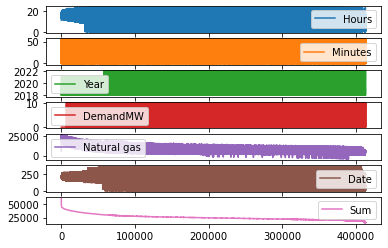

In [19]:
axes = final_df.plot.line(subplots=True)

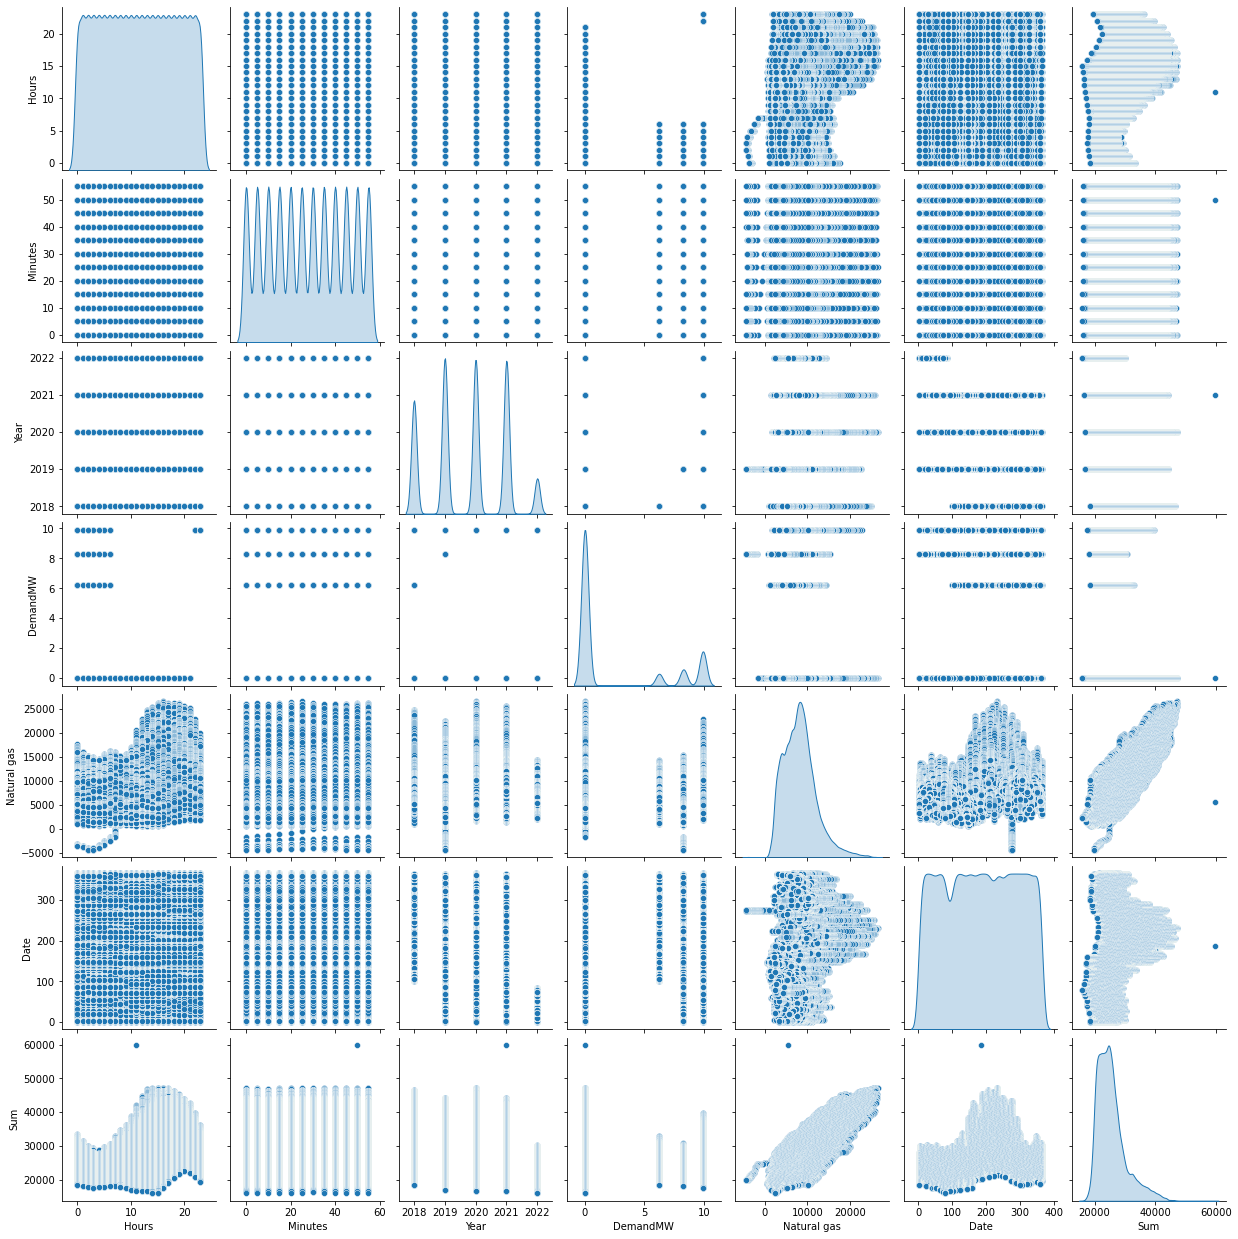

In [20]:
import seaborn as sns
sns.pairplot(data=final_df, diag_kind='kde')

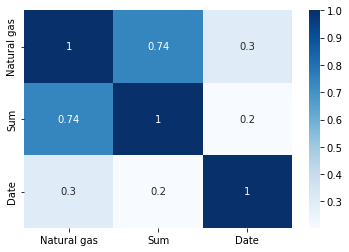

In [21]:
sns.heatmap(final_df[['Natural gas','Sum', 'Date']].corr(), cmap='Blues', annot=True)
plt.show()

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(final_df[['Natural gas','Sum']])
final_df[['Natural gas','Sum']] = imputer.transform(final_df[['Natural gas','Sum']])
final_df

,Hours,Minutes,Year,DemandMW,Natural gas,Date,Sum,Month-D.A,Day-DA,DateAttribute
0,11,50,2021,0.0,5568.0,186,59874.0,7,5,75
1,16,25,2020,0.0,26540.0,231,47279.0,8,18,818
2,15,55,2020,0.0,26159.0,231,47243.0,8,18,818
3,15,50,2020,0.0,26132.0,231,47210.0,8,18,818
4,15,40,2020,0.0,26015.0,231,47209.0,8,18,818
...,...,...,...,...,...,...,...,...,...,...
412947,2,35,2022,0.0,7891.0,73,24551.0,3,14,314
412948,2,40,2022,0.0,7891.0,73,24551.0,3,14,314
412949,2,45,2022,0.0,7891.0,73,24551.0,3,14,314
412950,2,50,2022,0.0,7891.0,73,24551.0,3,14,314


In [23]:
final_df= final_df.drop(['Year', 'DemandMW', 'Month-D.A', 'Day-DA', 'DateAttribute'],1)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [24]:
# Create our features
X = final_df.drop("Natural gas", axis = 1)

# Create our target
y = final_df.loc[:, 'Natural gas'].copy()

In [25]:
final_df.isnull().values.any()

False

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(model.predict(X_train))


[ 6959.86577591 14844.84124836  7950.12173923 ...  8554.45616826
  9093.89595198  9833.69617641]


In [29]:
print(training_score)

0.5690242668873742


In [30]:
print(testing_score)

0.5705012639915177


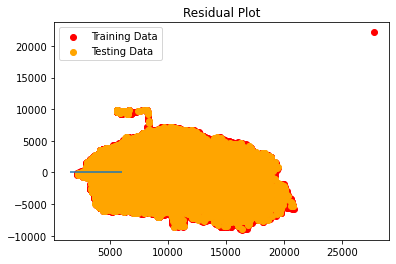

In [31]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="red", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=6000, xmax=1500)
plt.title("Residual Plot")
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5693226987782648


Predicting Future Natural Gas Demand

In [33]:
df2030 = pd.read_csv("CAISO-ALL-SUPPLY-DATA.csv")
df2030.head()

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,7/5/21,11:50:00,7/5/21 11:50
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,8/18/20,16:25:00,8/18/20 16:25
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,8/18/20,15:55:00,8/18/20 15:55
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,8/18/20,15:50:00,8/18/20 15:50
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,8/18/20,15:40:00,8/18/20 15:40


In [34]:
df2030['Sum'] = df2030['Renewables'] + df2030['Large hydro'] + df2030['Imports'] + df2030['Batteries'] + df2030['Nuclear'] + df2030['Coal'] + df2030['Other'] + df2030['Natural gas']

In [35]:
other_df = df2030['Time'].str.split(":", expand=True)
print(other_df)

         0   1   2
0       11  50  00
1       16  25  00
2       15  55  00
3       15  50  00
4       15  40  00
...     ..  ..  ..
412947   2  35  00
412948   2  40  00
412949   2  45  00
412950   2  50  00
412951   2  55  00

[412952 rows x 3 columns]


In [36]:
#Format the baby_df into int.
other_df[0] = other_df[0].astype(int)
other_df[1] = other_df[1].astype(int)
#Clean baby_df
other_df= other_df.drop([2],1)

# Rename columns and create years value for calculating demand_EV
other_df = other_df.rename(columns={other_df.columns[0]: 'Hours'})
other_df = other_df.rename(columns={other_df.columns[1]: 'Minutes'})
other_df

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Hours,Minutes
0,11,50
1,16,25
2,15,55
3,15,50
4,15,40
...,...,...
412947,2,35
412948,2,40
412949,2,45
412950,2,50


In [37]:
df2030['Date'] = pd.to_datetime(df2030['Date'])

#Create a new column for'Year'
other_df['Year'] = df2030['Date'].dt.year
#Convert to integers to be used in computations
other_df['Year'] = other_df['Year'].astype(int)

other_df.head(100)

,Hours,Minutes,Year
0,11,50,2021
1,16,25,2020
2,15,55,2020
3,15,50,2020
4,15,40,2020
...,...,...,...
95,17,15,2020
96,17,15,2020
97,15,50,2020
98,15,50,2020


In [38]:
#Make a date string column 
date_df = pd.DataFrame()
df2030['Date1']=df2030['Date'].astype(str)

date_df = df2030['Date1'].str.split("-", expand=True)
date_df['DateAttribute'] = date_df[1] + date_df[2]
date_df = date_df.drop([0,1,2],1)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [39]:
calc_df = pd.merge(other_df, date_df, left_index=True, right_index=True, how='outer')
calc_df.head(-5)

,Hours,Minutes,Year,DateAttribute
0,11,50,2021,0705
1,16,25,2020,0818
2,15,55,2020,0818
3,15,50,2020,0818
4,15,40,2020,0818
...,...,...,...,...
412942,2,10,2022,0314
412943,2,15,2022,0314
412944,2,20,2022,0314
412945,2,25,2022,0314


In [40]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [41]:
df2030['Date'] = df2030['Date'].apply(fun)
df2030.head(1300)

,Renewables,Natural gas,Large hydro,Imports,Batteries,Nuclear,Coal,Other,Date,Time,DateTime,Sum,Date1
0,50036.0,5568.0,78.0,2353.0,-447.0,2265.0,21.0,0.0,186,11:50:00,7/5/21 11:50,59874.0,2021-07-05
1,8695.0,26540.0,5081.0,4575.0,119.0,2248.0,21.0,0.0,231,16:25:00,8/18/20 16:25,47279.0,2020-08-18
2,9301.0,26159.0,4408.0,5035.0,67.0,2250.0,23.0,0.0,231,15:55:00,8/18/20 15:55,47243.0,2020-08-18
3,9343.0,26132.0,4382.0,5032.0,49.0,2250.0,22.0,0.0,231,15:50:00,8/18/20 15:50,47210.0,2020-08-18
4,9283.0,26015.0,4300.0,5278.0,63.0,2248.0,22.0,0.0,231,15:40:00,8/18/20 15:40,47209.0,2020-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,232,12:55:00,8/19/20 12:55,43089.0,2020-08-19
1296,13006.0,20240.0,3017.0,4564.0,-15.0,2257.0,20.0,0.0,233,12:55:00,8/20/20 12:55,43089.0,2020-08-20
1297,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,232,19:15:00,8/19/20 19:15,43087.0,2020-08-19
1298,5842.0,24279.0,4693.0,5863.0,144.0,2244.0,22.0,0.0,233,19:15:00,8/20/20 19:15,43087.0,2020-08-20


In [42]:
df2030 = df2030.drop(['Date1'],1)
df2030final = pd.merge(df2030, calc_df, left_index=True, right_index=True, how='outer')
df2030final
df2030final['DateTime'] = pd.to_datetime(df2030final['DateTime'])

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [43]:
df1= pd.DataFrame()
df1 = df2030final.groupby(['DateAttribute','Time'])['Sum'].agg('mean')
df1 = df1.reset_index()
df1 = df1.rename(columns={df1.columns[2]: 'AvgSUM(3yr)'}).round(2)
df2 = df1.copy

print(len(df1))
df1.dtypes

105408


DateAttribute     object
Time              object
AvgSUM(3yr)      float64
dtype: object

In [44]:
df1['Date1']= "2020" + df1['DateAttribute']
df1['pDateTime'] = df1['Date1'] +" " +df1['Time']
df1['Date2']= pd.to_datetime(df1['pDateTime'])
df1=df1.set_index('Date2')       
                                            
df1=df1.sort_index(ascending=True)
df1=df1.reset_index()
ev_df2=df1.drop(['DateAttribute','Date1','pDateTime','Time'],1)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [45]:
df1 = df1.drop(df1.index[16992:17280])
df1 = df1.reset_index(drop=True)
print(len(df1))
df1

105120


,Date2,DateAttribute,Time,AvgSUM(3yr),Date1,pDateTime
0,2020-01-01 00:00:00,0101,0:00:00,23008.50,20200101,20200101 0:00:00
1,2020-01-01 00:05:00,0101,0:05:00,22992.00,20200101,20200101 0:05:00
2,2020-01-01 00:10:00,0101,0:10:00,22944.25,20200101,20200101 0:10:00
3,2020-01-01 00:15:00,0101,0:15:00,22891.00,20200101,20200101 0:15:00
4,2020-01-01 00:20:00,0101,0:20:00,22834.25,20200101,20200101 0:20:00
...,...,...,...,...,...,...
105115,2020-12-31 23:35:00,1231,23:35:00,23266.50,20201231,20201231 23:35:00
105116,2020-12-31 23:40:00,1231,23:40:00,23171.50,20201231,20201231 23:40:00
105117,2020-12-31 23:45:00,1231,23:45:00,23105.00,20201231,20201231 23:45:00
105118,2020-12-31 23:50:00,1231,23:50:00,23031.75,20201231,20201231 23:50:00


In [46]:
df1= df1.drop(['DateAttribute', 'Date1', 'pDateTime'],1)
df1.head(1000)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Date2,Time,AvgSUM(3yr)
0,2020-01-01 00:00:00,0:00:00,23008.50
1,2020-01-01 00:05:00,0:05:00,22992.00
2,2020-01-01 00:10:00,0:10:00,22944.25
3,2020-01-01 00:15:00,0:15:00,22891.00
4,2020-01-01 00:20:00,0:20:00,22834.25
...,...,...,...
995,2020-01-04 10:55:00,10:55:00,22957.50
996,2020-01-04 11:00:00,11:00:00,22929.25
997,2020-01-04 11:05:00,11:05:00,22828.50
998,2020-01-04 11:10:00,11:10:00,22846.00


In [47]:
time_df = df1['Time'].str.split(":", expand=True)
time_df.head()

,0,1,2
0,0,00,00
1,0,05,00
2,0,10,00
3,0,15,00
4,0,20,00


In [48]:
#Format the baby_df into int.
time_df[0] = time_df[0].astype(int)
time_df[1] = time_df[1].astype(int)


# Rename columns and create years value for calculating demand_EV
time_df = time_df.rename(columns={time_df.columns[0]: 'Hours'})
time_df = time_df.rename(columns={time_df.columns[1]: 'Minutes'})


In [49]:
final_demand_df = pd.merge(time_df, df1, left_index=True, right_index=True, how='outer')
final_demand_df.head()

,Hours,Minutes,2,Date2,Time,AvgSUM(3yr)
0,0,0,00,2020-01-01 00:00:00,0:00:00,23008.50
1,0,5,00,2020-01-01 00:05:00,0:05:00,22992.00
2,0,10,00,2020-01-01 00:10:00,0:10:00,22944.25
3,0,15,00,2020-01-01 00:15:00,0:15:00,22891.00
4,0,20,00,2020-01-01 00:20:00,0:20:00,22834.25


In [50]:
def fun(datetimething):
     return datetimething.timetuple().tm_yday

In [51]:
final_demand_df['Date2'] = final_demand_df['Date2'].apply(fun)

In [52]:
final_demand_df= final_demand_df.drop(['Time', 'Date2'],1)
df1.head(1000)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Date2,Time,AvgSUM(3yr)
0,2020-01-01 00:00:00,0:00:00,23008.50
1,2020-01-01 00:05:00,0:05:00,22992.00
2,2020-01-01 00:10:00,0:10:00,22944.25
3,2020-01-01 00:15:00,0:15:00,22891.00
4,2020-01-01 00:20:00,0:20:00,22834.25
...,...,...,...
995,2020-01-04 10:55:00,10:55:00,22957.50
996,2020-01-04 11:00:00,11:00:00,22929.25
997,2020-01-04 11:05:00,11:05:00,22828.50
998,2020-01-04 11:10:00,11:10:00,22846.00


In [53]:
final_demand_df.head(1000)

,Hours,Minutes,2,AvgSUM(3yr)
0,0,0,00,23008.50
1,0,5,00,22992.00
2,0,10,00,22944.25
3,0,15,00,22891.00
4,0,20,00,22834.25
...,...,...,...,...
995,10,55,00,22957.50
996,11,0,00,22929.25
997,11,5,00,22828.50
998,11,10,00,22846.00


In [54]:
final_demand_df = final_demand_df.rename(columns={2: 'Day', 'AvgSUM(3yr)': 'AvgSum'})

In [55]:
final_demand_df.head()

,Hours,Minutes,Day,AvgSum
0,0,0,00,23008.50
1,0,5,00,22992.00
2,0,10,00,22944.25
3,0,15,00,22891.00
4,0,20,00,22834.25


In [56]:
len(final_demand_df)

105120

In [57]:
mask = (final_demand_df['Hours'] < 7) | (final_demand_df['Hours'] > 21)
final_demand_df.loc[mask, 'AvgSum'] += 106.68

In [58]:
final_demand_df.head(1000)

,Hours,Minutes,Day,AvgSum
0,0,0,00,23115.18
1,0,5,00,23098.68
2,0,10,00,23050.93
3,0,15,00,22997.68
4,0,20,00,22940.93
...,...,...,...,...
995,10,55,00,22957.50
996,11,0,00,22929.25
997,11,5,00,22828.50
998,11,10,00,22846.00


In [59]:
print(len(final_demand_df.loc[final_demand_df['AvgSum'] < 0]))
print(final_demand_df['AvgSum'].mean())
print(final_df['Sum'].mean())


0
25488.596306593685
25472.23918276216


In [61]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
for natgas in model.predict(final_demand_df):
    print(natgas)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AvgSum
- Day
Feature names seen at fit time, yet now missing:
- Date
- Sum

  warnings.warn(message, FutureWarning)


5828.295730575741
5818.418343041718
5790.721220101488
5759.887823729769
5727.058616992552
5683.5375690116125
5620.771206791971
5583.522705674017
5546.844436089061
5507.31500883911
5451.106309248953
5408.440608567511
5369.71052889018
5323.9085547772465
5279.817275263309
5237.151574581869
5198.1923788649165
5151.249941685985
5115.284461517278
5092.291748724287
5063.311604834813
5028.486587732101
4982.256939969418
4960.832363892174
4927.091810128581
4912.937686097068
4897.21542534981
4894.608489861519
4855.221620494818
4818.258235143363
4790.133438553385
4766.427936344147
4749.707770414141
4736.836667331876
4715.69720702113
4680.44451626867
4643.282573307084
4671.895814250465
4680.693509422146
4670.388448238375
4658.087576689106
4644.931357840342
4633.6283914738215
4611.91869963008
4587.642965887842
4572.776052440082
4581.858863378262
4571.5538021944885
4564.614130481828
4577.546004267748
4600.8846035308925
4594.143489428363
4582.697965178591
4592.92123918277
4603.5721868366945
4611.37197

4979.381916784152
4987.609380422835
4986.0003501172905
5000.785476385456
4992.562783723548
5024.45485598167
5043.089045097577
5091.232716046161
5069.095350552669
5132.777830775462
5181.49173325704
5192.427796677466
5184.831335275438
5238.249647904258
5291.382844766578
5345.513946811645
5381.056524307378
5380.730514951081
5446.69392130587
5527.76846328512
5549.253810066019
5540.231769831495
5583.671030632837
5598.741272667503
5668.553741870031
5738.36621107256
5813.025648305576
5894.1001902848275
5970.129206623458
6017.274972389294
6057.435401875897
6152.338058530362
6232.6998110933655
6270.294198681473
6353.221993142968
6464.091132721394
6585.652113543545
6688.823127426489
6790.711120360189
6936.934614984528
7110.758339232416
7257.837181156252
7385.100477308388
7524.766309303242
7684.5328028362965
7809.657730739687
7902.849692795156
7960.402184038216
8011.53957053504
8051.5574421383935
8093.428566223991
8114.486239355141
8121.944913850693
8110.356831717676
8102.475254549148
8089.889267

8322.241232069053
8287.416214966343
8254.729566112377
8236.726379233121
8210.88250877514
8203.998836789358
8179.437987280622
8159.296432152625
8113.295900429561
8057.229758722653
8045.641676589634
8013.952932918417
7995.8071881559135
7921.208521626553
7892.370935620327
7854.97987661912
7810.318365572184
7754.109665982027
7694.337019310629
7665.784549070902
7619.21378581484
7553.311150163707
7484.27224108108
7432.197720105163
7379.267851829747
7339.1681930468
7266.707894766183
7224.327309851238
7154.860727118865
7091.809249132724
7004.808046760643
6921.798465119553
6904.4121517223575
6768.941269045397
6681.512393023568
6594.796306417986
6557.5478053000315
6467.695445262958
6388.6774843528565
6310.087197092504
6217.6687951569365
6142.642454977826
6063.481936184477
5986.887459289619
5921.499055444603
5858.305019575213
5822.339539406505
5732.77229513593
5680.982889926512
5642.166252092811
5574.980595492432
5517.773990719525
5451.301123535393
5390.958245330996
5315.931905151885
5243.7567226

6075.291259895126
6138.7751825077885
6234.105512812004
6265.284795653879
6277.6464379068
6318.947330459399
6378.353074184704
6450.161353752726
6536.510537412214
6680.310548021309
6755.825332553823
6838.325453365571
6957.890623822224
7061.005637978289
7163.321304561738
7263.641160779689
7359.399164733653
7496.926628479763
7641.581986388355
7755.444841515024
7901.810894022612
8025.510243093506
8117.13406843323
8222.72856633142
8263.45922735102
8272.62859644557
8271.874913439524
8276.253314230466
8287.18937765089
8279.307800482362
8293.95036886728
8266.680919576798
8243.260533134058
8211.57178946284
8205.400906893308
8188.680740963302
8168.681743718555
8132.090032289967
8138.749359212903
8121.316403866649
8108.587858667634
8105.838365296093
8072.866600675627
8053.152719197378
8026.453501439895
8012.8696089413825
7982.749001985911
7942.506785319712
7923.933366907462
7892.473739275862
7838.118292167948
7797.590959735253
7753.7847959878145
7720.527915600849
7680.428256817902
7650.59276562893

4537.863124290478
4494.856308115657
4453.045954733714
4445.592051214935
4423.312127838193
4416.000782202662
4377.6118180187095
4367.591872601437
4351.01426455468
4321.4638891322065
4309.02045969969
4304.7028296124045
4306.80030427135
4287.315538832721
4287.987434659171
4286.378404353629
4281.633100616593
4265.340608336335
4260.025073066301
4260.554411009502
4269.209548297933
4269.881444124383
4273.547055499077
4264.81013103105
4283.871993796705
4296.890425738995
4362.996389977034
4384.909410407681
4399.9796524423455
4387.1085493600785
4371.956520145819
4379.898868018001
4422.482781519848
4458.081358742462
4475.147411142623
4506.611809750997
4548.482933836593
4591.15340549481
4719.272048946443
4788.799402382472
4817.555201209103
4856.717725512959
4896.735597116309
4935.042774120666
4994.8761914957195
5062.122618799756
5098.433985438618
5141.017898940465
5204.985494929755
5295.127741710105
5438.3575207861995
5525.562051745184
5594.804289414715
5652.356780657774
5709.481598251083
5743.939

6584.788516274024
6569.636487059763
6562.269141697352
6537.850850071865
6519.990221075863
6506.5488864605995
6471.153637824889
6421.930274513963
6414.6189288784335
6388.489942653952
6343.685873723765
6302.873425524571
6247.234957467412
6178.053490501536
6138.6106214079555
6109.48791963523
6084.214280710246
6018.739318708862
5980.20779664166
5938.112327493216
5892.595469146781
5842.659316419609
5805.2682574184055
5757.042799290228
5709.672688461547
5694.663217130537
5658.214063585199
5573.208671578614
5566.752673242583
5523.089067378394
5496.532407504163
5446.881370543488
5406.63915387729
5378.942030937062
5381.609737129007
5347.354951559295
5290.718578319389
5274.283528155882
5248.09854220452
5247.059743431973
5251.0104705731665
5251.539808516369
5235.104758352862
5191.298594605421
5179.425396705903
5209.179100715282
5172.643389013576
5194.271293677724
5152.175824529282
5148.000752325244
5164.440573465525
5147.7204075355185
5157.088334240198
5127.110285167975
5088.151089451025
5050.189

7826.83271066268
7810.825334148922
7777.711011645208
7762.558982430948
7731.155354526229
7701.604979103755
7687.735970838739
7652.62583796953
7624.215925613053
7602.363675886059
7569.962142798593
7531.802294654259
7500.968898282539
7455.737155702604
7419.344001884147
7377.676206385453
7341.7107262167465
7302.608972616546
7266.073260914838
7222.552212933899
7165.7732818107415
7136.650580038018
7073.171428402129
7023.892065364322
6980.6561331498815
6936.137179986195
6890.335205873262
6852.088799572561
6798.303583997647
6737.675590026751
6682.607353502588
6605.157529308233
6545.242324753586
6476.345973554209
6397.18545476086
6386.214246109897
6273.124951103133
6203.373252604259
6116.229492348928
6037.639205088577
5958.6212441784755
5883.880019765864
5814.698552799988
5747.6554540828565
5676.763292517986
5613.141582998847
5538.400358586236
5451.3431564872735
5411.100939821077
5311.839759489527
5240.662482158157
5167.774510227791
5106.576284723895
5054.216647981479
5007.844442335545
4944.50

5279.877689175237
5300.650246539888
5326.127214051778
5317.532847467002
5302.5233761359905
5313.601997439664
5279.774885519702
5288.002349158383
5302.5023596600495
5326.268632572943
5358.674936637184
5384.151904149074
5399.222146183738
5434.535607639853
5463.576522232983
5501.598583470841
5533.633213612211
5557.542044408356
5567.195086879534
5551.615384015524
5578.945604009659
5646.7622628466925
5682.5899561089245
5700.226240042084
5652.2858976804055
5716.11093578645
5787.063868054975
5788.733669064173
5858.831254033199
5921.088155423497
5978.640646666556
6057.576820397062
6111.1376909091305
6197.486874568618
6300.316772958184
6330.640708500561
6403.8745669010805
6494.785602824557
6597.956616707503
6687.299515915232
6771.367773442724
6835.335369432018
6943.353351345451
7020.86394624346
7083.5485212835065
7187.717440349201
7284.8450234087795
7342.254956768589
7372.151218661216
7460.638770569449
7510.635694000277
7586.007920649541
7646.126453791094
7676.16527356697
7746.547974302499
7764

4840.328706065904
4825.319234734894
4830.980656475082
4772.776146519427
4729.112540655238
4699.134491583016
4659.462506449818
4621.643773798865
4566.718095157954
4512.505205933292
4481.956925328068
4442.656614117739
4416.670185776506
4363.312643851341
4339.607141642104
4303.213987823645
4263.684560573696
4230.285122303481
4201.162420530756
4163.628803646303
4125.9526288786
4084.2848333799047
4055.01957372393
4050.788501793013
4014.2527900913065
4023.0504852629874
4021.441454957443
3999.1615315806994
3974.315566305464
3958.735863441456
3945.0094130596917
3938.5534147236613
3932.8102058038785
3924.358397102351
3902.648705258607
3895.994149312446
3910.3516019308627
3911.1660556405623
3904.5674994212823
3898.2540589684995
3886.2383031857316
3883.488809814191
3886.584189655885
3878.132380954359
3882.9384553950495
3894.4447503484735
3916.928002312119
3934.080612868649
3985.9307887817213
4017.680303156596
4041.1614603029902
4058.6551863528966
4087.6961009460265
4101.198206264946
4124.67936341

6365.599398809511
6285.104538228947
6190.741646765851
6133.05604750523
6075.187974154045
6016.3619118274255
5927.131104161317
5855.759948108729
5772.607808584389
5670.449852065205
5629.306669576868
5547.997401330533
5490.12362566402
5385.114511479844
5300.633732483617
5243.330188350103
5160.936456764652
5073.034288570432
5009.270021168042
4952.160355755745
4894.0984036833415
4836.41280442272
4786.716148939406
4728.416042782088
4688.60149976564
4701.624610596842
4666.942151377381
4622.75963481816
4567.3549616895325
4515.5655564801145
4478.413994722769
4428.717339239454
4376.545878902927
4346.807327074563
4319.914230595863
4267.880649253675
4252.015830623166
4265.8030517085845
4217.623212103048
4181.423937005808
4137.617773258369
4115.856760576658
4092.960987144277
4071.205676777892
4036.1411624313223
4013.6217418107226
3993.1950709162247
3967.5803164978606
3968.8224438573106
3965.1263661409903
3947.550852911487
3913.056570097915
3901.9417801372856
3888.928119171771
3869.2655585314897
38

3563.9224613181923
3624.9828999156107
3624.5143326760644
3655.9787312844383
3663.4934055068734
3616.8360840944406
3636.325620509846
3672.1579926609884
3714.0804375845546
3714.558454689788
3788.4138654612743
3836.0329233995
3827.3929382920833
3832.1886315285337
3872.394679537776
3948.7191928471475
3992.7286851814915
4038.8309272419374
4106.408088835113
4188.811270286249
4227.688678823606
4273.790920884052
4354.865462863303
4385.759629938679
4453.336791531854
4518.959082393261
4553.656693793737
4580.559240138122
4684.631219843206
4748.5988158325
4833.28862573096
4916.832270248093
5030.410009608262
5094.565782003447
5192.370917160873
5262.799236419041
5315.550378154254
5385.546344873759
5425.752392883003
5467.292782679462
5541.142491135621
5582.11264939908
5636.574485733288
5695.221821519703
5779.717752696944
5885.124074189243
5922.667140939384
6001.654635507859
6061.248555639053
6120.786476043368
6245.768846063509
6275.716428794105
6362.493286103341
6440.1464388846
6529.010343604614
6625

6742.2722120132385
6812.654912748765
6893.729454728016
6957.26937706756
7041.907866128051
7120.986597741807
7156.014943431423
7192.041194303785
7223.307035302028
7248.356329164168
7253.5900772546065
7252.266162715563
7226.279734374331
7227.52186173378
7199.2545072605535
7179.540625782303
7149.562576710081
7119.014296104859
7081.480679220405
7041.523578320706
6977.845869074687
6929.477853063259
6898.929572458039
6860.968281923835
6829.707211902365
6769.6494494644685
6710.447034326067
6648.1083457561745
6587.337793902028
6551.942545266318
6470.5011003409745
6420.422389730551
6374.952173333177
6261.292646793412
6223.188798375959
6164.841730537057
6095.660263571182
6030.3278594530475
5952.735477375443
5884.9795892420625
5788.569566575505
5732.6459827518465
5644.504317313769
5563.205430271675
5495.250984528164
5404.258161425094
5389.961479510332
5313.794676265225
5271.128975583782
5224.614212054601
5154.719955672479
5073.84874228013
5008.3737802787455
4940.475334262117
4854.899710722533
481

5336.154788848313
5302.185119045098
5280.190311434855
5277.583375946564
5274.121093158776
5264.386263508002
5265.628390867452
5244.631488439956
5207.897219128119
5171.0763916599135
5193.844759390058
5175.984130394056
5138.878187159351
5164.782828320987
5142.788020710745
5128.633896679232
5127.452540023438
5100.753322265957
5108.553112254891
5103.522692751356
5078.478169865988
5085.707728321924
5100.777970356588
5097.1731296855505
5097.5599097455015
5108.781088932426
5099.4739329314
5126.661595042286
5138.595563645458
5157.942542177612
5202.379708161705
5241.684790348809
5209.7974890674595
5205.194743213673
5225.539626928576
5227.637101587523
5256.963131947152
5278.163362961552
5275.841543239758
5304.3122262998895
5274.619292994166
5296.817429191315
5335.69483772867
5356.75251085982
5395.288803903795
5415.633687618696
5418.443951693893
5446.9146347540245
5474.244854748158
5509.1306425545245
5549.148514157876
5591.732427659723
5620.2031107198545
5587.944135515636
5658.041720484665
5681.8

7249.405249568583
7311.804708842128
7337.281676354018
7393.836262414328
7450.67596424114
7477.293394819026
7532.70751781334
7571.956600273565
7637.920006628352
7617.065662084107
7612.177800463822
7657.042640097663
7715.878152289968
7760.600434040558
7794.203200897677
7798.866717455117
7821.7776430685135
7852.52925226064
7868.5973994780525
7898.4376616437985
7927.05090258718
7937.559292357857
7943.2207140980445
7948.882135838234
7932.161969908228
7959.0645162526125
7992.809840992979
7994.907315651928
8034.212397839032
8082.641184554113
8123.942077106714
8167.467896064427
8204.777167886035
8236.52668226091
8267.848522986034
8298.74269006141
8303.976438151849
8297.662997699068
8278.091674104067
8250.964782696838
8208.869313548394
8172.191043963438
8142.640668540964
8073.545759731458
8020.615891456042
7987.786684718827
7935.569605859659
7893.189020944717
7839.261247486555
7781.6269690639
7730.835469037227
7687.884652589288
7634.954784313872
7564.49029639875
7485.472335488648
7439.004213908

6557.852798180387
6501.50154070698
6440.873546736084
6362.71093312548
6281.982277616384
6180.526729309207
6059.4541928404615
6025.199407270749
5929.92984767019
5859.037686105319
5792.849934687687
5735.92844568128
5665.036284116408
5602.127364013517
5529.239392083151
5438.67424262983
5380.897406323926
5496.420978370566
5453.612719805877
5414.796081972176
5351.0318145697875
5310.932155786837
5278.958296349119
5238.145848149923
5185.358537757758
5137.27563751283
5113.1424616538425
5086.728359662862
5013.697829849243
4949.735004836726
4888.8218950993305
4857.70338296111
4807.19699870094
4757.973635390012
4717.446302957316
4676.348738991621
4624.559333782203
4588.5938536134945
4568.737414251997
4532.34426043354
4496.80645391458
4458.931721536746
4451.762933784466
4435.898115153959
4409.769128929476
4384.7806057709895
4373.477639404469
4346.635863763739
4319.651530239758
4316.759478984968
4278.655630567517
4256.518265074024
4242.934372575508
4234.141448380604
4258.763068592994
4248.315449525

5631.118310285779
5638.347868741714
5676.79760362932
5688.3038985827425
5663.457933307507
5680.381427824417
5721.539762493769
5737.180236061431
5751.537688679848
5806.096464374665
5818.687222667204
5918.721963118658
6051.40245883428
6108.384718544341
6118.322876782018
6108.160373481494
6109.259942957695
6102.803944621663
6121.5806916208185
6109.707493721302
6119.075420425981
6146.405640420115
6142.887357905445
6192.314049803275
6211.233354685681
6232.861259349829
6271.453552120685
6271.8403321806345
6276.218732971576
6284.01852296051
6310.921069304895
6279.232325633677
6294.587683434842
6306.5216520380145
6366.869301219185
6415.583203700766
6407.13139499924
6417.354669003416
6459.083235205766
6498.245759509618
6488.225814092346
6495.45537254828
6510.383056699697
6526.023530267359
6549.077013764005
6577.262581057637
6621.358631548348
6673.493923227921
6715.650163080019
6722.024374236456
6780.8598864287615
6793.649202331431
6818.9836119600695
6870.976345756393
6905.71957567951
6904.39566

6671.362044996355
6676.453235203546
6693.091613953957
6699.55238326676
6763.092305606306
6821.215028382363
6876.629151376677
6846.080870771457
6841.4781249176685
6852.271630454845
6865.060946357515
6859.4602953209815
6868.828222025661
6864.510591938375
6887.706633318268
6886.896950585342
6906.1013712342465
6955.813178898576
6959.051116623519
7008.477808521349
7041.652901728718
7073.259858220341
7090.183352737253
7121.647751345627
7137.57334067979
7150.22009869921
7167.998940515619
7206.2501177930935
7263.802609036153
7339.317393568668
7362.370877065314
7375.445308734483
7384.95579332241
7412.713686966294
7441.7546015594235
7500.59011375173
7537.61426980684
7558.386827171491
7601.255856439837
7606.005931153646
7621.361288954811
7631.869678725487
7688.566822669049
7692.660107693491
7693.902235052938
7735.203127605539
7771.371936361151
7815.096312928994
7818.619366420438
7873.605815765004
7868.14772261172
7901.837047625208
7911.490090096386
7898.333871247622
7964.4398354856585
7971.099162

11398.714876546605
11462.9675883024
11509.685680418483
11565.955150712292
11566.285931045364
11603.167529217226
11565.063680799773
11589.115069479165
11632.839446047012
11661.737802756892
11652.430646755867
11673.060646237267
11684.994614840441
11685.523952783642
11688.904448391833
11678.456829324812
11663.106242500424
11647.383981753163
11588.751798147761
11573.172095283753
11549.609150957764
11530.037827362765
11487.087010914827
11439.716900086147
11401.898167435193
11382.041728073695
11345.648574255236
11318.806798614503
11257.410015500482
11215.171988468788
11205.152043051516
11199.979065664731
11207.351182003917
11202.320762500382
11186.028270220122
11190.264113127814
11163.850011136834
11137.721024912353
11141.24407840379
11056.951475813454
10978.590304592723
10945.475982089007
10908.370038854304
10865.846896056111
10818.049111577682
10742.024866215823
10672.1306098337
10602.949142867827
10513.5244564805
10409.701423884962
10295.614223695444
10202.625590226879
10162.857689159493


5649.621040532791
5677.378934176675
5687.174534531103
5715.217543941486
5751.671468463597
5794.199382238563
5919.181752258704
6007.669304166937
6046.546712704292
6084.283658175651
6139.412665403464
6132.671551300933
6172.119191371288
6205.721958228407
6206.536411938108
6196.373908637586
6206.73974052501
6223.179561665293
6379.809781766855
6488.540553096536
6531.97981389788
6578.697906013967
6589.6339694343915
6638.775545565721
6735.388896819182
6795.649987843986
6850.066205655552
6895.501276822391
6963.032819892924
6953.139348839331
7092.092391417938
7252.001442834242
7269.922842533901
7321.345344797224
7375.191331075792
7423.762675674123
7407.470183393867
7457.752222591194
7504.612872590529
7536.504944848653
7637.395032599605
7656.686011404878
7715.806639363682
7783.053066667717
7799.976561184629
7777.268964158136
7792.054090426302
7802.705038080227
7818.773185297639
7815.310902509851
7796.5949262143495
7836.470239934453
7855.817218466607
7864.701471794657
7881.910082078066
7893.41637

10840.418817663161
10885.283657297
10937.989180509572
11022.143996193434
11105.64202218793
11167.043576278731
11218.466078542053
11301.96410453655
11375.910752353317
11477.228513754017
11542.05145704281
11610.58090529609
11689.231963260092
11787.556009112552
11854.802436416587
11949.649093344175
12042.698497516394
12125.34117621139
12220.243832865857
12281.930502723157
12366.426433900397
12431.819608722188
12551.099663412344
12611.930985970143
12690.01181240115
12740.864083131473
12814.525615181745
12894.546252251366
12977.901720362614
13034.598864306172
13082.742535254754
13185.058201838205
13280.38853214242
13316.129667248282
13420.868817846975
13477.851077557036
13558.640503769784
13645.987592612018
13731.623986855258
13787.26722588919
13862.211778888708
13911.923586553035
13987.43837108555
14074.072670511538
14156.857907089783
14216.976440231338
14254.000596286445
14335.787927681944
14397.47459753924
14458.87615163004
14523.841652802083
14596.734395709223
14596.693502119426
14624.7

13318.939931323479
13351.259677231352
13429.625619428854
13497.299720382638
13581.22542002688
13690.89809681243
13745.17175674075
13793.885659222331
13856.997907912126
13925.669914048656
13976.807300545483
14024.665855727566
14096.046461645841
14158.873594569137
14230.824432020407
14267.848588075518
14320.981784937838
14416.54123128167
14383.284350894708
14380.107183873417
14397.886025689826
14454.725727516638
14499.590567150477
14534.761470723344
14597.73116152989
14647.300411310967
14671.922031523354
14716.074081740946
14749.106617065067
14792.347320256282
14781.89970118926
14758.479314746524
14767.989799334453
14841.508773501471
14889.652444450054
14905.720591667465
14939.180800641334
14978.628440711691
14981.296146903635
14991.66197879106
14990.195506368764
14975.415151077374
14903.525084329758
14877.538655988523
14847.275491149801
14836.257640549782
14853.751366599692
14844.444210598667
14839.98402262813
14813.85503640365
14787.868608062414
14763.307758553674
14728.910415100712
14

8370.536595792111
8412.12260411121
8448.57652863332
8502.992746444888
8560.402679804698
8629.35980170773
8701.25463943212
8763.083867172669
8805.097549141517
8852.243314907353
8869.87959884051
8910.325144093611
8980.280171179389
9044.960556584934
9108.357921041228
9163.772044035537
9222.607556227846
9273.45982695817
9407.36734389616
9444.81917360102
9477.138919508892
9523.857011624976
9563.019535928834
9592.488124171712
9712.766084044615
9766.897186089682
9846.261033469938
9917.071407855208
9969.919488951029
10117.140888758116
10166.654138812315
10258.990753568287
10324.811602039827
10407.881954384575
10455.597951683405
10541.376903809894
10613.470299144417
10722.771302007099
10772.055436021677
10851.56184128518
10965.994927944848
11072.587331025785
11234.293635197453
11277.305222349049
11409.985718064672
11437.030822292309
11569.28364435818
11667.60769021064
11715.181129626224
11805.37937613345
11889.162517894445
12015.28535098058
12084.670146533357
12219.203894731225
12319.7528669887

7753.456651170636
7798.321490804477
7833.207278610842
7845.283805097264
7840.823617126727
7905.07632888252
7957.069062678842
7980.835335591737
8023.2766912103325
8076.552445955902
8061.241775338822
8201.192723100175
8325.17718793757
8397.840814805091
8468.651189190368
8471.318895382312
8492.80424216321
8571.455300127218
8650.961705390722
8650.635696034426
8702.200756180999
8761.178826256555
8776.193068564338
8911.154490411955
9086.03211956947
9148.289020959768
9153.66532693346
9201.096208465795
9240.686406419398
9285.978919702986
9281.3761738492
9313.41080399057
9357.562854208161
9407.417219755742
9455.790006743944
9450.902145123659
9513.729278046954
9551.323665635064
9566.251349786478
9601.849927009094
9598.530202104554
9644.678062687643
9666.448525235035
9707.749417787636
9755.46541508647
9837.822978014967
9908.007121140367
9966.129843916424
10006.147715519775
10056.714870483604
10107.852256980426
10154.142675446765
10172.064075146423
10240.878639166203
10281.466742302557
10363.96686

10059.666553079962
10096.207035758445
10139.36118079329
10138.750055670494
10194.164178664807
10247.154817643877
10313.831013414914
10358.980968815256
10400.852092900852
10425.616270996496
10476.325983843566
10532.738012020629
10558.072421649267
10630.822606673159
10642.756575276333
10684.342583595433
10725.215802498282
10783.766198924088
10827.918249141683
10946.628072298838
11003.18265835915
11064.013980916952
11129.692271505239
11195.513119976775
11254.348632169083
11324.675333177729
11384.651308436034
11471.000492095522
11518.431373627856
11580.5457171349
11652.353996702925
11732.28807561618
11771.308042036784
11805.62359831015
11868.735846999945
11924.292527877507
12014.490774384736
12109.907662845322
12145.791355834433
12237.415181174158
12296.393251249716
12390.155444838183
12451.842114695482
12511.532974187285
12585.051948354307
12620.22285192717
12694.312057627187
12736.753413245784
12795.30380967159
12884.02047761944
12909.640003014578
12993.993376308572
13070.506066023834
13

5899.015549040076
5911.662307059498
5929.013475226155
5996.774134336309
6124.465104138193
6199.694772904208
6249.834254218285
6292.418167720132
6329.727439541741
6366.466479830351
6419.599676692671
6493.973998159188
6530.285364798052
6570.160678518154
6624.43433844647
6734.24957311527
6955.315956445671
7096.122251506524
7149.825679901842
7197.114003550927
7230.574212524794
7249.778633173699
7280.245126599326
7321.4034612686755
7354.150880826297
7376.206459140194
7395.125764022598
7375.25324114153
7457.040572537029
7566.199017516459
7615.625709414289
7689.00212569806
7691.099600357005
7728.408872178614
7818.607118685843
7871.170084015164
7890.659620430568
7917.419608891703
7957.437480495057
7962.472670975365
8062.792527193318
8186.919549913962
8218.526506405586
8271.232029618157
8306.83060684077
8315.05807047945
8338.254111859345
8431.731189681315
8468.897903619676
8508.91577522303
8562.904319384847
8600.442707246075
8628.058043006708
8645.266653290118
8659.338990142036
8693.08431488240

7258.238080612644
7274.392785986425
7314.980889122777
7345.875056198152
7374.345739258284
7395.1182966229335
7409.190633474849
7394.323720027089
7455.29760046814
7472.3636528683
7519.651976517385
7561.523100602983
7604.107014104829
7651.339338027034
7684.371873351154
7706.997683198049
7743.451607720161
7734.429567485637
7764.753503028012
7813.182289743094
7851.204350980952
7905.33545302602
7940.934030248633
7977.673070537245
7991.887965272412
8031.992395032134
8103.373000950407
8186.7284690616525
8259.249538045924
8318.22760812148
8368.08197366906
8417.651223450135
8466.935357464716
8525.628311773771
8606.417737986523
8669.244870909819
8745.472444858582
8825.778197694703
8909.989013105445
9050.510192399797
9155.10678511524
9236.75155862749
9314.262153525498
9408.309462880468
9463.86614375803
9553.066485082512
9650.535183635468
9734.460883279713
9859.158137533355
9969.543603735154
10062.450450024124
10224.070196039422
10318.68773692739
10363.410018677983
10425.381804301778
10499.4710100

8170.209139465944
8228.046746475502
8264.643228880863
8319.629678225429
8347.38757186931
8361.317350837979
8398.769180542839
8446.627735724922
8463.266114475333
8551.896224266815
8471.880358173967
8519.255239979419
8527.055029968353
8617.96606589183
8646.00907530221
8694.010188367543
8759.118247422835
8808.402381437412
8878.92764005619
8929.779910786516
8984.48124436458
9048.163724587375
9109.137605028423
9194.860557428034
9300.882728975972
9379.106113290229
9448.205793076511
9491.502495994606
9532.375714897455
9576.6703229983
9697.8036301707
9753.787984698014
9817.898138570552
9897.689659600557
9971.778865300574
10036.403250979234
10106.928509598012
10226.921353704416
10301.865906703933
10369.540007657717
10441.77596087549
10514.58214562626
10552.31909109762
10617.427150152907
10705.05935476164
10800.532242949106
10888.02188967459
10946.801402140016
10969.997443519911
11095.55004507305
11151.534399600365
11241.304972457841
11301.708621365895
11427.261222919034
11474.54954656812
11507.

8712.182920851843
8639.626706637035
8509.858139290061
8410.454401075262
8305.063231763976
8209.793672163416
8084.44439919718
7985.040660982382
7884.496459701582
7780.103195573045
7678.418531226251
7579.87014031095
7474.6215288829135
7364.897623347259
7282.030599589418
7213.134248390041
7128.128856383455
7013.043751011195
6931.887421852349
6848.45016656151
6759.310595940682
6649.785248015158
6578.893086450287
6495.740946925947
6416.152754482848
6529.823074047243
6489.153183731298
6443.493767501614
6398.9748143379275
6330.648694671547
6262.18001712192
6184.302519277817
6129.947072169905
6067.180709950264
6003.273884664626
5943.073564343478
5872.323960661855
5805.3674201010945
5786.508885922345
5752.254100352633
5707.877705072195
5655.518068329777
5599.5944845061185
5556.215994408429
5516.116335625482
5474.163424360289
5414.105661922391
5368.731361459206
5327.9189132600095
5286.622791684185
5252.938237647471
5219.681357260506
5194.550276218772
5173.125700141525
5132.313251942331
5107.3247

6732.175616543025
6728.570775871987
6863.104524069853
6881.881271069009
6933.161215449083
6997.699042971375
7079.201258600375
7145.164664955164
7221.906470710042
7262.922247496144
7287.258751942036
7347.3772850835885
7419.328122534862
7473.1741088134295
7550.542145828189
7620.212057147468
7696.439631096229
7751.853754090545
7796.148362191387
7815.63789860679
7818.677278721605
7769.73903117718
7787.090199343838
7847.208732485391
7885.0882358399995
7957.751862707521
8012.453196285585
8056.890362269678
8125.990042055957
8213.052015131694
8264.331959511768
8355.385553318494
8411.741581768674
8422.107413656102
8441.026718538507
8497.15363094907
8553.99333277588
8584.459826201508
8624.33513992161
8653.946286047738
8716.060629554786
8753.655017142895
8778.561753121785
8811.451730562656
8858.25638083511
8866.911518123541
8845.772057812797
8864.548804811953
8890.88111962334
8949.859189698895
9007.98191247495
9082.213676058222
9157.728460590733
9202.735858107826
9238.762108980183
9262.5283818930

5047.439156825041
5095.725385656875
5137.596509742472
5201.136432082016
5264.62035469468
5428.521026841974
5538.962492770652
5603.500320292944
5685.430209571692
5752.534078992476
5807.235412570542
5914.112931417978
5978.7933168235195
6024.513503756858
6074.225311421187
6129.781992298749
6106.91575386944
6193.977726945175
6272.343669142683
6300.101562786565
6332.278750811189
6312.422311449689
6342.7462469920665
6367.652982970956
6363.192795000419
6336.49357724294
6358.264039790338
6380.889849637233
6374.235293691072
6402.563418867952
6484.920981796451
6528.360242597795
6551.841399744189
6538.9702966619225
6547.055202417354
6546.301519411309
6540.558310491526
6526.119070693514
6543.4702388601745
6573.9367322858
6535.776884141467
6598.176343415014
6653.020234876329
6628.459385367594
6600.7622624273645
6619.824125193018
6601.393264664017
6606.199339104707
6601.311477484422
6576.893185858935
6591.535754243852
6581.658366709829
6499.875806291104
6530.05718395023
6576.6327181830675
6581.58135

5392.644972590277
5378.205732792267
5375.313681537476
5352.891200277483
5330.326161134242
5291.652081183791
5270.456621146166
5278.2564111350985
5286.341316890532
5310.107589803425
5262.024689558497
5227.769903988783
5225.73320003349
5243.939715499648
5257.726936585066
5242.0046758378085
5235.976351151525
5243.9186990237085
5244.962268773026
5236.5104600715
5273.819731893111
5265.2253653083335
5301.679289830445
5344.12064544904
5343.652078209494
5360.718130609655
5374.220235928573
5403.261150521705
5411.916287810134
5414.0137624690815
5412.348732436658
5429.4147848368175
5462.162204394439
5458.129690073651
5482.181078753043
5513.788035244668
5540.97569735555
5554.905476324218
5592.642421795577
5630.949598799934
5678.09536456577
5687.3207333872
5716.733321903197
5752.331899125811
5781.230255835691
5829.231368901024
5862.834135758143
5918.248258752457
5948.572194294833
5988.447508014937
6012.926570344078
6072.902545602381
6128.031552830196
6183.018002174762
6214.854074706003
6253.4463674

7935.725916989468
7896.481605506018
7853.815904824576
7802.454173264907
7779.461460471915
7744.921559135704
7713.090257581236
7668.08763104092
7605.178710938029
7598.5801547187475
7543.369360311339
7500.561101746647
7463.4551585119425
7428.630141409232
7390.526292991777
7337.1687510666125
7287.945387755688
7230.738782982784
7179.234493539863
7119.405847141585
7032.689760536003
6998.862648616039
6948.498822239117
6895.854069730201
6822.395866266837
6758.061367331449
6688.879900365573
6615.706812668708
6564.345081109039
6495.591287792911
6424.414010461542
6390.205866840888
6295.506538773327
6222.90368260946
6131.7683016231385
6064.867760789259
6002.956745869116
5911.393691233046
5839.361066602176
5763.336821240318
5688.453038944457
5614.5671618313445
5558.358462241187
5486.554953649937
5409.5328031053305
5352.6113140989255
5310.515844950482
5268.990607335038
5228.890948552091
5141.0343988805125
5096.2303299503255
5024.6253789692055
4971.55295281054
4908.92914847415
4835.8986186605325
494

4808.2071516182805
4836.107603145414
4891.806841906227
4912.579399270879
4937.201019483269
4983.206322183107
5031.064877365188
5093.265779028607
5242.340431317938
5325.981015195683
5363.57540278379
5412.716978915121
5414.529337807568
5429.599579842232
5451.370042389632
5487.396293261994
5488.495862738193
5511.12167258509
5521.630062355764
5470.965036692773
5545.4819160425395
5633.256678534524
5642.054373706205
5665.107857202851
5666.777658212046
5655.1895760790285
5669.4044708141955
5652.114073351191
5668.895009984852
5661.298548582823
5676.796464267238
5659.164951310851
5668.247762249031
5700.567508156904
5680.853626678656
5658.716261185164
5637.291685107917
5634.5421917363765
5630.937351065339
5648.145961348748
5610.754902347544
5577.7831377270795
5552.366940918844
5522.903123652739
5501.763663341995
5517.974368442656
5474.310762578469
5456.735249348963
5442.7236832007
5406.187971498994
5368.939470381039
5326.986559115847
5324.807297277304
5313.361773027535
5264.13840971661
5232.6787

7071.629445288978
7107.370580394841
7137.409400170718
7171.154724911086
7228.564658270896
7277.563676518976
7334.688494112286
7391.385638055848
7432.630530881566
7490.1830221246255
7466.7626356818855
7572.784807229824
7632.760782488127
7724.669723594352
7789.635224766391
7916.755963035277
8021.780229400467
8153.462819933342
8324.919059892867
8484.257879776173
8644.253489348846
8753.126818561777
8843.752738718755
8945.355615885954
9034.413399327183
9081.559165093018
9127.707025676107
9162.022581949474
9168.539350989162
9183.894708790325
9216.071896814945
9191.796163072708
9195.690890487022
9148.46333754159
9138.585950007568
9138.54505641777
9131.233710782242
9102.966356309014
9091.378274175997
9075.085781895737
9042.399133041774
9024.253388279269
9013.378095562499
8994.804677150247
8972.468754046622
8957.031609065863
8922.634265612904
8897.788300337666
8878.359534625919
8829.278729198242
8797.875101293524
8776.165409449779
8767.856158631503
8739.303688391776
8710.893776035298
8684.33711

5300.406381154911
5266.151595585199
5237.314009578973
5206.480613207254
5178.213258734026
5136.260347468833
5110.416477010849
5087.281206334608
5054.110884104013
5026.698876930284
4983.462944715844
4941.9377071004
4915.381047226168
4894.241586915423
4885.504662447398
4865.22054943615
4883.427064902307
4878.539203282022
4868.9469315145
4850.516070985495
4843.006167739837
4871.761966566468
4890.681271448873
4912.024060346523
4918.968503035956
4917.929704263412
4901.209538333405
4890.191687733386
4890.863583559836
4886.2608377060515
4892.0648173294885
4912.409701044389
4923.859996270934
4961.596941742291
4980.8013623911975
5006.135772019836
5010.086499161027
5049.534139231382
5073.5855279107745
5111.750147031882
5134.090841112278
5145.312020299203
5185.757565552305
5250.437950957845
5313.63675780401
5472.975577687315
5550.343614702077
5594.638222802918
5655.184429594219
5708.745300106288
5763.874307334103
5847.229775445347
5922.031770561614
5963.902894647212
6028.298164286254
6116.2154846

5577.039210203022
5559.463696973517
5523.6407746880595
5519.837376406889
5482.588875288935
5452.895941983212
5477.802677962101
5449.107649839127
5446.643272234085
5440.044716014801
5445.563579871741
5469.329852784635
5464.0143175146
5467.109697356294
5454.09603639078
5449.722406576611
5427.870156849618
5459.191997574744
5479.394323406395
5482.632261131341
5508.822018059478
5490.676273296973
5484.93306437719
5500.430980061605
5509.941464649533
5537.9844740599165
5534.237075505627
5519.741835980734
5564.179001964827
5548.17162545107
5559.392804637993
5596.987192226103
5628.4515908344765
5644.377180168638
5674.843673594265
5741.092195715553
5749.034543587735
5790.192878257085
5786.873153352546
5843.514297569227
5765.921915491623
5792.824461836008
5829.563502124618
5840.9272391947925
5865.548859407185
5942.9168964219425
5978.658031527806
5991.304789547226
6062.685395465502
6097.856299038367
6111.073288590787
6167.856990690716
6261.619184279185
6269.846647917868
6348.782821648374
6431.71061

In [63]:
final_demand_df['Predicted 2030 NatGas'] = model.predict(final_demand_df)

C:\Users\the_d\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AvgSum
- Day
Feature names seen at fit time, yet now missing:
- Date
- Sum

  warnings.warn(message, FutureWarning)


In [73]:
final_demand_df.head()

,Hours,Minutes,Day,AvgSum,Predicted 2030 NatGas
0,0,0,00,23115.18,5828.295731
1,0,5,00,23098.68,5818.418343
2,0,10,00,23050.93,5790.721220
3,0,15,00,22997.68,5759.887824
4,0,20,00,22940.93,5727.058617


In [72]:
# Create the output file (CSV)
output_data_file = "FINAL_DEMAND.csv"

# Export the DataFrame into a CSV without the index
final_demand_df.to_csv(output_data_file, index=False)

In [74]:
from sqlalchemy import create_engine

# SQLAlchemy connectable
cnx = create_engine('sqlite:///db-carenewable.db').connect()

# table named 'FINAL_DEMAND' will be returned as a dataframe.
final_demand_df.to_sql('FINAL_DEMAND', cnx)

# Close connection
cnx.close()

In [64]:
len(final_demand_df)

105120

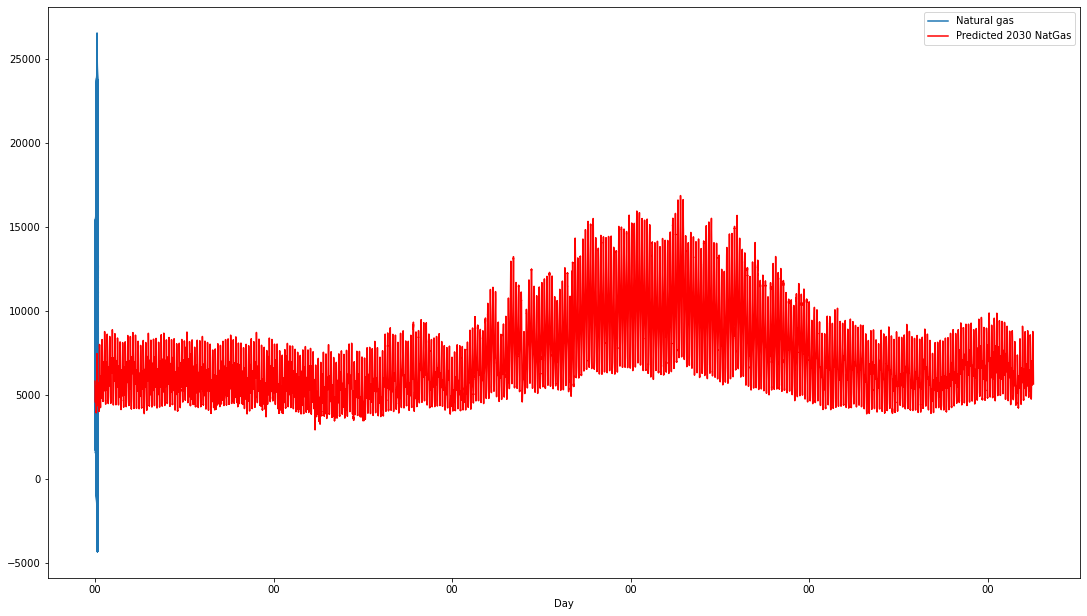

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# gca stands for 'get current axis'
ax = plt.gca()

df2030.plot(kind='line',x='Date',y='Natural gas',ax=ax)
final_demand_df.plot(kind='line',x='Day',y='Predicted 2030 NatGas', color='red', ax=ax)

plt.show()